# Moving Average Convergence Divergence (MACD) Stategy 

In [2]:
# Data manipulation packages
import numpy as np
import pandas as pd

# Financial packages
import talib as ta
import yfinance as yf
import pyfolio as pf

# Graphing packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

import datetime

/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


## Import dataset

In [21]:
data = yf.download('MSFT')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064384,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400
...,...,...,...,...,...,...
2022-06-24,261.809998,267.980011,261.720001,267.700012,267.700012,33900700
2022-06-27,268.209991,268.299988,263.279999,264.890015,264.890015,24615100
2022-06-28,263.980011,266.910004,256.320007,256.480011,256.480011,27295500


## Compute Indicators

In [22]:
def MACD(df):
    df['EMA12'] = df['Adj Close'].ewm(span=12).mean()
    df['EMA26'] = df['Adj Close'].ewm(span=26).mean()
    df['MACDfast'] = df.EMA12-df.EMA26
    df['MACDslow'] = df.MACDfast.ewm(span=9).mean()
    return df

In [23]:
df = MACD(data)
df

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACDfast,MACDslow
Date,,,,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800,0.061109,0.061109,0.000000,0.000000
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000,0.062291,0.062243,0.000049,0.000027
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064384,133171200,0.063108,0.063012,0.000096,0.000055
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400,0.062994,0.062937,0.000056,0.000056
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400,0.062630,0.062640,-0.000010,0.000036
...,...,...,...,...,...,...,...,...,...,...
2022-06-24,261.809998,267.980011,261.720001,267.700012,267.700012,33900700,257.132088,260.703868,-3.571781,-4.759165
2022-06-27,268.209991,268.299988,263.279999,264.890015,264.890015,24615100,258.325615,261.013953,-2.688338,-4.344999
2022-06-28,263.980011,266.910004,256.320007,256.480011,256.480011,27295500,258.041676,260.678106,-2.636430,-4.003285


<AxesSubplot:xlabel='Date'>

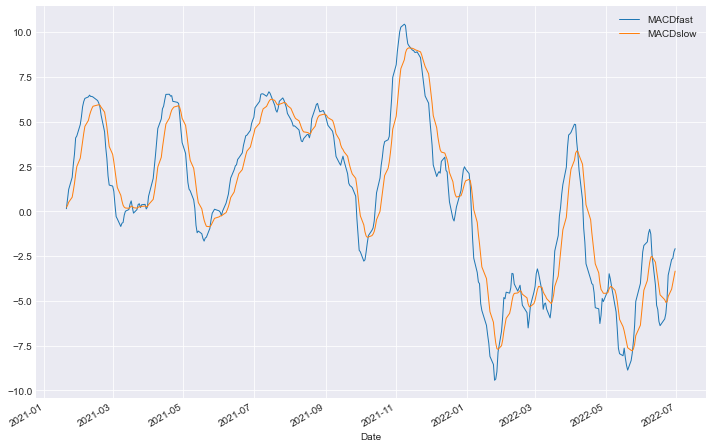

In [26]:
data.iloc[-365:][['MACDfast', 'MACDslow']].plot(grid=True, linewidth=1, figsize=(12, 8))

## Compute Signals

In [27]:
#signals
data['signal'] = np.where((data['MACDfast'] > data['MACDslow']), 1, 0)
data['signal'] = np.where((data['MACDfast'] < data['MACDslow']), -1, data['signal'])

data.dropna(inplace=True)
data['signal'].value_counts()

 1    4657
-1    4492
 0       1
Name: signal, dtype: int64

## Compute Returns

In [28]:
# Returns
data['returns'] = data['Adj Close'].pct_change()
# Strategy returns 
data['strategy_returns'] = data['returns'].shift(-1) * data['signal']
data

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACDfast,MACDslow,signal,returns,strategy_returns
Date,,,,,,,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800,0.061109,0.061109,0.000000,0.000000,0,NaN,0.000000
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000,0.062291,0.062243,0.000049,0.000027,1,0.035712,0.017250
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064384,133171200,0.063108,0.063012,0.000096,0.000055,1,0.017250,-0.025432
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400,0.062994,0.062937,0.000056,0.000056,1,-0.025432,-0.017390
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400,0.062630,0.062640,-0.000010,0.000036,-1,-0.017390,0.026547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,261.809998,267.980011,261.720001,267.700012,267.700012,33900700,257.132088,260.703868,-3.571781,-4.759165,1,0.034150,-0.010497
2022-06-27,268.209991,268.299988,263.279999,264.890015,264.890015,24615100,258.325615,261.013953,-2.688338,-4.344999,1,-0.010497,-0.031749
2022-06-28,263.980011,266.910004,256.320007,256.480011,256.480011,27295500,258.041676,260.678106,-2.636430,-4.003285,1,-0.031749,0.014738


## Extract Entry/Exit Points

In [29]:
data['entry'] = data['signal'].diff()
data['entry'].value_counts()

 0.0    8440
-2.0     354
 2.0     354
 1.0       1
Name: entry, dtype: int64

## Strategy Performance Analysis

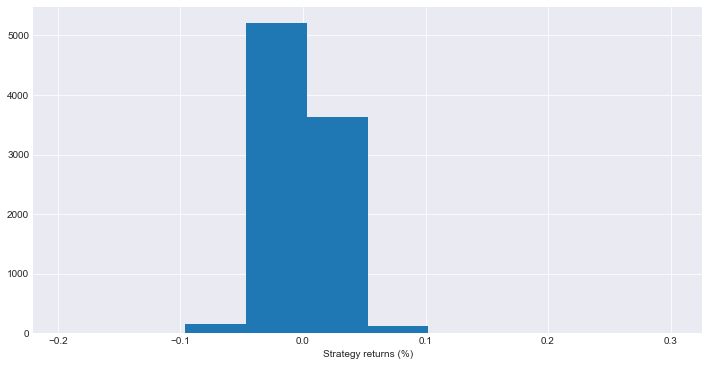

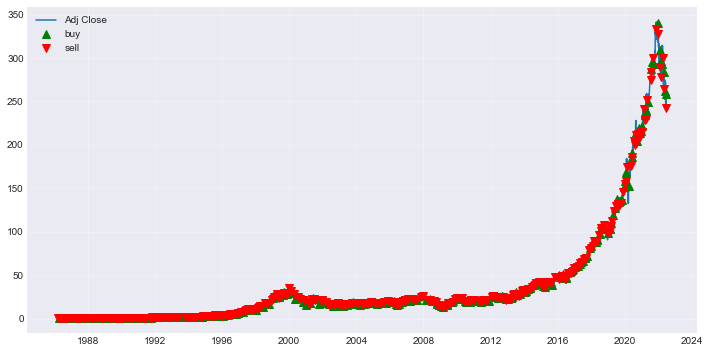

/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


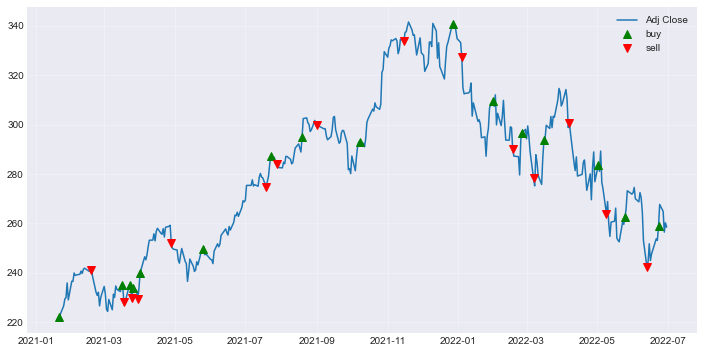

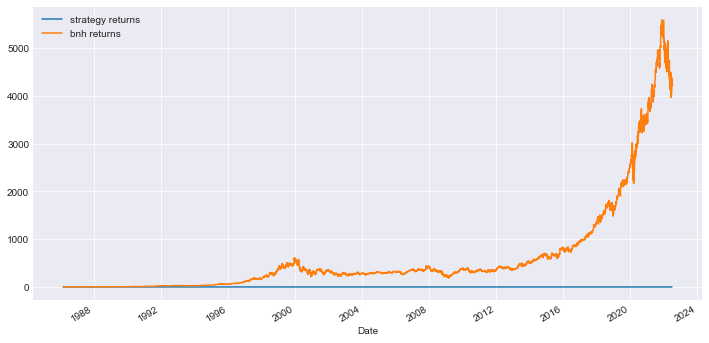

Start date,1986-03-13
End date,2022-06-30
Total months,435
,Backtest
Annual return,-5.5%
Cumulative returns,-87.2%
Annual volatility,33.9%
Sharpe ratio,0.00
Calmar ratio,-0.06
Stability,0.16
Max drawdown,-94.3%


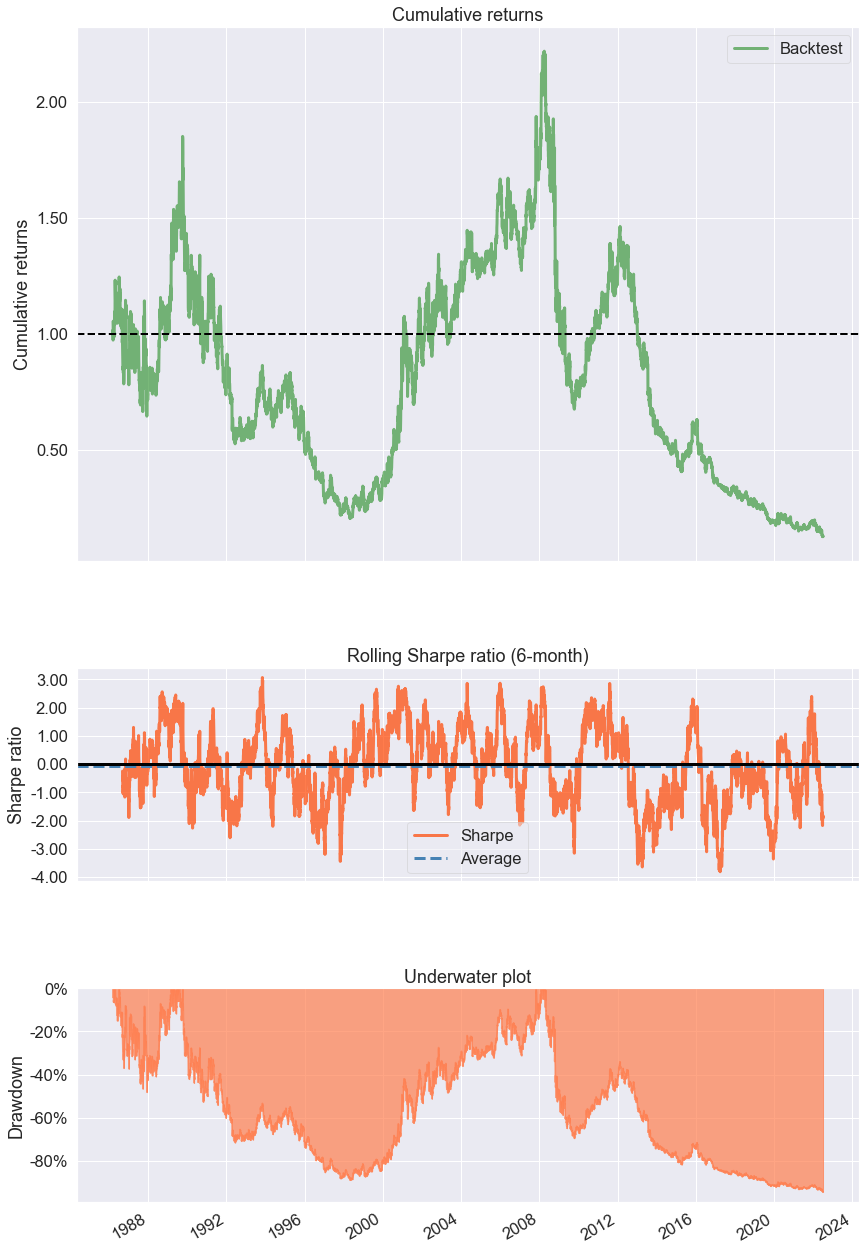

In [31]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 12, 6
data.strategy_returns.hist()
plt.xlabel('Strategy returns (%)')
plt.show()

plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(data['Adj Close'], label = 'Adj Close')

plt.plot(data[data.entry == 2].index, data['Adj Close'][data.entry == 2], '^', color = 'g', markersize = 8,label='buy')
plt.plot(data[data.entry == -2].index, data['Adj Close'][data.entry == -2], 'v',color = 'r', markersize = 8,label='sell')
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(data['Adj Close'][-365:], label = 'Adj Close')
plt.plot(data[-365:][data.entry == 2].index, data['Adj Close'][-365:][data.entry == 2], '^', color = 'g', markersize = 8,label='buy')
plt.plot(data[-365:][data.entry == -2].index, data['Adj Close'][-365:][data.entry == -2], 'v',color = 'r', markersize = 8,label='sell')
plt.legend()
plt.show()

(data.strategy_returns+1).cumprod().plot(label='strategy returns')
(data.returns+1).cumprod().plot(label='bnh returns')
plt.legend()
plt.show()

# general analytics)
pf.create_simple_tear_sheet(data.strategy_returns)